In [2]:
import torch
import numpy as np
import os, sys

In [3]:
# this allows us to access teh datamodule folder
sys.path.append('../../')

In [5]:
path_to_labels = '../Labels/Test_Subject_3'
os.listdir(path_to_labels)

['By_1', 'By_2']

In [3]:
# cohen's kappa
# preds -> shape (N, ...) or float tensor of shape (N, C, ...)
# target -> shape (N, ...)

In [4]:
from torchmetrics.classification import MulticlassCohenKappa

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from training.dataloaders.datamodule import AssemblyDataModule

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# TODO: make it so you can just say the participants name and attain everything else
dm = AssemblyDataModule(
        fit_query= None,
        test_query = {
            # queries can be the same as above
            'participants': [
                'Test_Subject_1',
                'Test_Subject_3',
                'Test_Subject_4',
                'Test_Subject_7',
                'Test_Subject_9',
                'Test_Subject_10',
                'Test_Subject_12'], 
                
            'distribution':['ood', 'id'],
            'task': ['J', 'TB'], 
            'view': ['Top_View', 'Side_View'],
        },
        batch_size = 10
    )

Initialized None and {'participants': ['Test_Subject_1', 'Test_Subject_3', 'Test_Subject_4', 'Test_Subject_7', 'Test_Subject_9', 'Test_Subject_10', 'Test_Subject_12'], 'distribution': ['ood', 'id'], 'task': ['J', 'TB'], 'view': ['Top_View', 'Side_View']}


In [8]:
dm.setup(stage="test")

In [9]:
dataloaders = dm.predict_dataloader()

In [10]:
dataloaders

In [11]:
def get_cohen(y1, y2):
    cohenkappa = MulticlassCohenKappa(num_classes=3).to("cuda")
    return cohenkappa(y1, y2)

In [12]:
cohens = []
for batch in dataloaders:
    x, y = batch
    x = x.to("cuda")
    y1 = y[0].to("cuda")
    y2 = y[1].to("cuda")
    
    c = get_cohen(y1, y2)
    cohens.append(c)
    # had to change num_workers=0 to satisfy windows

In [13]:
mean_cohen = torch.mean(torch.stack(cohens))
mean_cohen.item()

0.9155868291854858

## Checking the Data

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

<>:26: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:26: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\itsjo\AppData\Local\Temp\ipykernel_21196\2360184671.py:26: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if col % 2 is not 0:
C:\Users\itsjo\AppData\Local\Temp\ipykernel_21196\2360184671.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


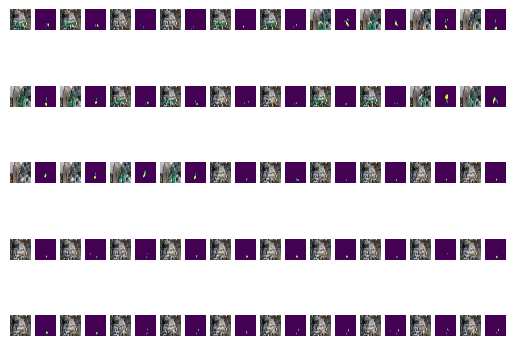

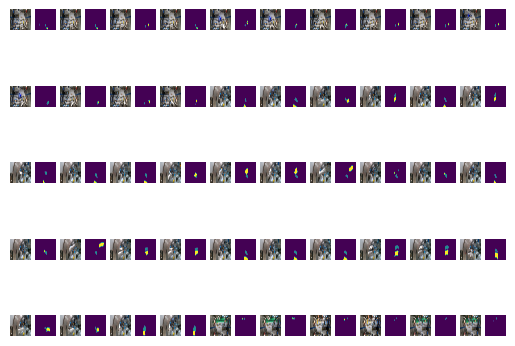

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:33                                                                                   │
│                                                                                                  │
│   30 │   │   │   │   ax.imshow(x[index].cpu().permute(1, 2, 0))                                  │
│   31 │   │   │   ax.axis('off')                                                                  │
│   32 │                                                                                           │
│ ❱ 33 │   plt.show()                                                                              │
│   34                                                                                             │
│                                                                                                  │
│ c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\matplotlib\pyplot.py:446 in show        │
│                                                                                                  │
│    443 │   explicitly there.                                                                     │
│    444 │   """                                                                                   │
│    445 │   _warn_if_gui_out_of_main_thread()                                                     │
│ ❱  446 │   return _get_backend_mod().show(*args, **kwargs)                                       │
│    447                                                                                           │
│    448                                                                                           │
│    449 def isinteractive():                                                                      │
│                                                                                                  │
│ c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\matplotlib_inline\backend_inline.py:90  │
│ in show                                                                                          │
│                                                                                                  │
│    87 │   │   close = InlineBackend.instance().close_figures                                     │
│    88 │   try:                                                                                   │
│    89 │   │   for figure_manager in Gcf.get_all_fig_managers():                                  │
│ ❱  90 │   │   │   display(                                                                       │
│    91 │   │   │   │   figure_manager.canvas.figure,                                              │
│    92 │   │   │   │   metadata=_fetch_figure_metadata(figure_manager.canvas.figure)              │
│    93 │   │   │   )                                                                              │
│                                                                                                  │
│ c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\IPython\core\display_functions.py:298   │
│ in display                                                                                       │
│                                                                                                  │
│   295 │   │   if raw:                                                                            │
│   296 │   │   │   publish_display_data(data=obj, metadata=metadata, **kwargs)                    │
│   297 │   │   else:                                                                              │
│ ❱ 298 │   │   │   format_dict, md_dict = format(obj, include=include, exclude=exclude)           │
│   299 │   │   │   if not format_dict:                                                            │
│   300 │   │   │   │   # nothing to display (e.g. _ipython_display_ took over)                    │
│   301 │   │   │   │   continue                             

In [12]:
for batch in dataloaders:
    x, y = batch
    x = x.to("cuda")
    y1 = y[0].to("cuda")
    y2 = y[1].to("cuda")

    # had to change num_workers=0 to satisfy windows

    imgs = x.shape[0]

    ## create fig and axis
    
    factor = 10

    nrows = int(x.shape[0] / factor)
    ncols = int(x.shape[0] / nrows * 2)
    
    fig, axes = plt.subplots(nrows= nrows, ncols= ncols)

    fig.tight_layout()

    index=0
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row, col]
            if col % 2 is not 0:
                ax.imshow(y1[index].cpu())
                index += 1
            else:
                ax.imshow(x[index].cpu().permute(1, 2, 0))
            ax.axis('off')

    plt.show()

In [ ]:
y1.shape

torch.Size([6, 161, 161])

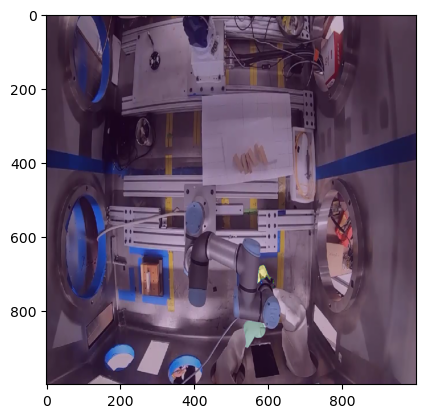

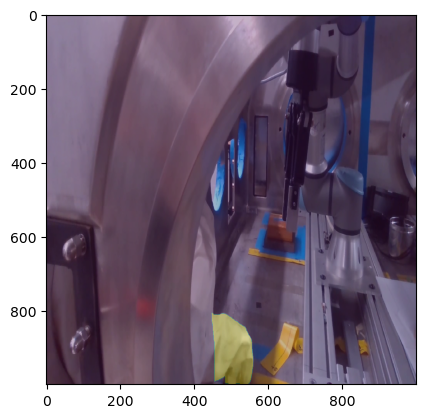

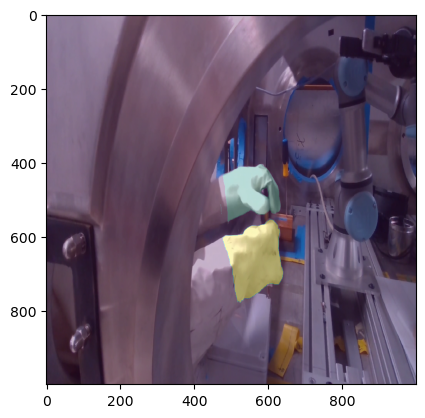

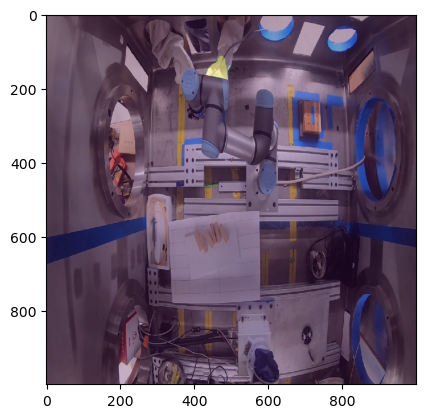

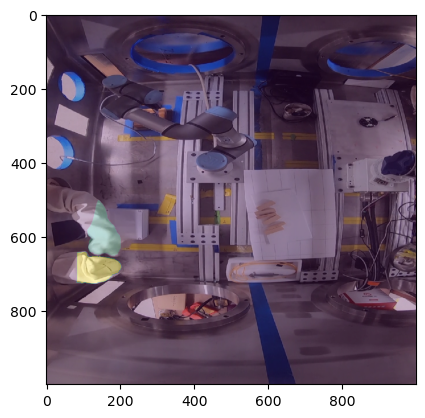

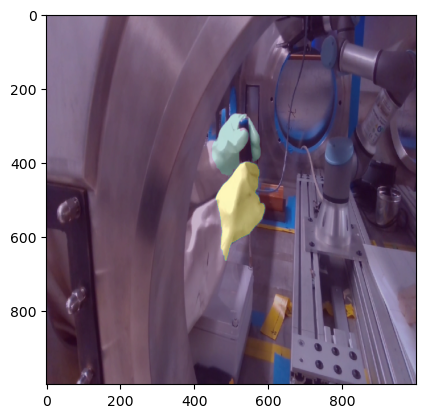

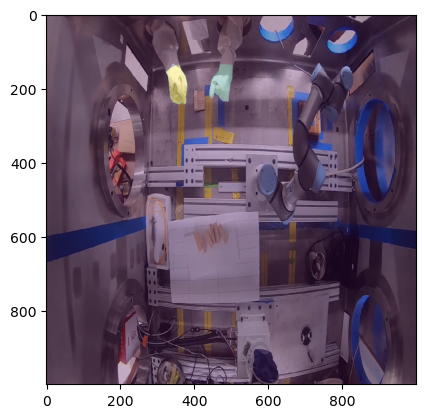

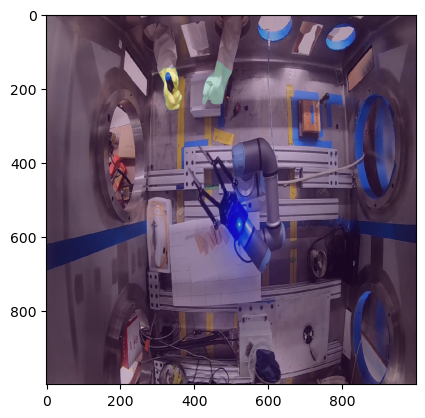

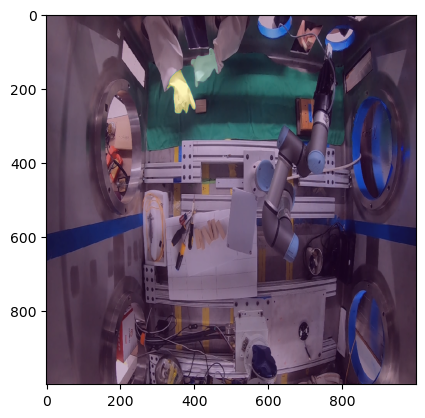

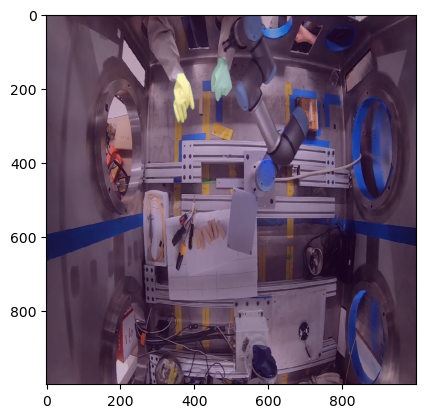

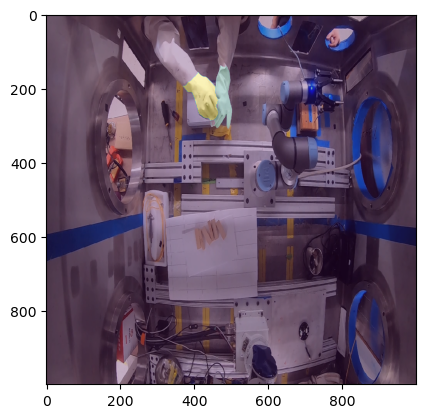

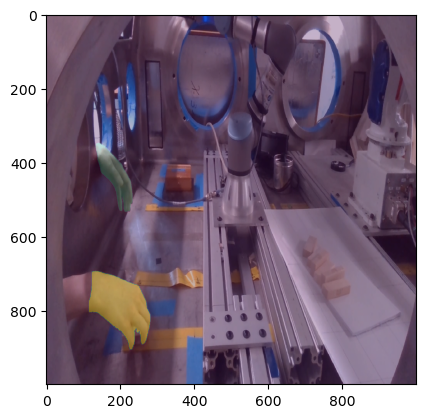

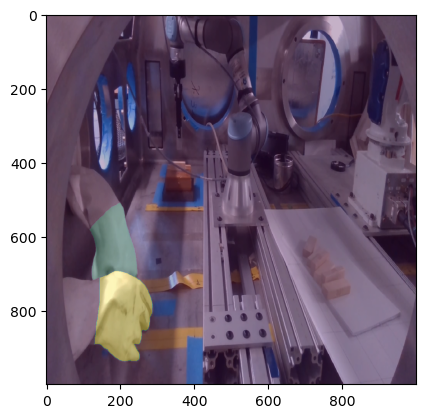

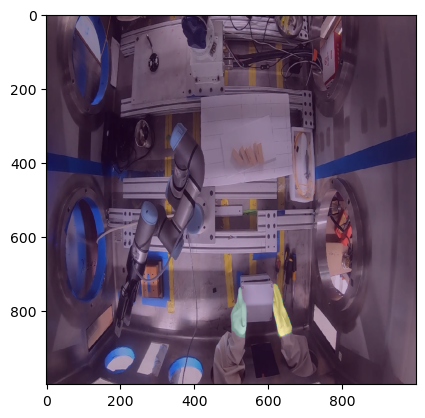

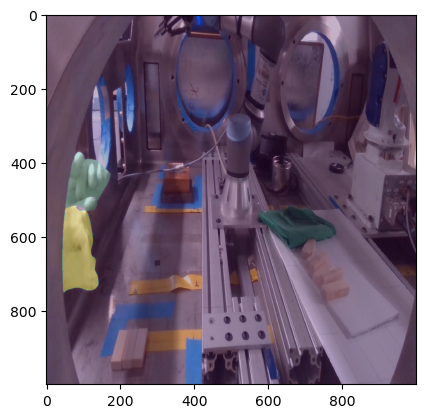

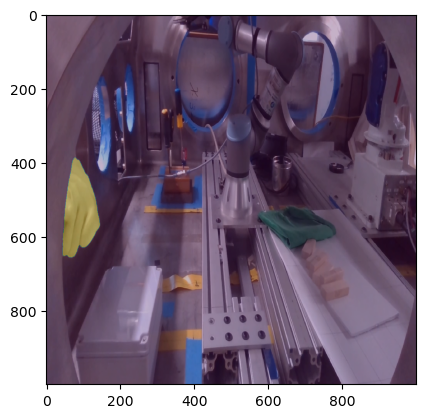

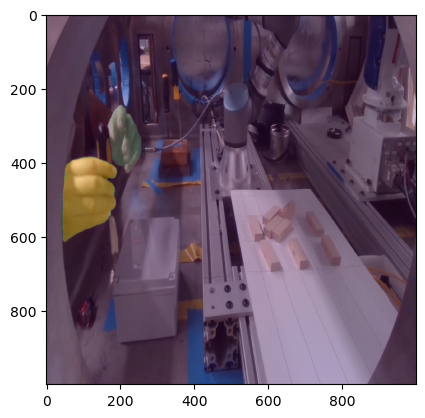

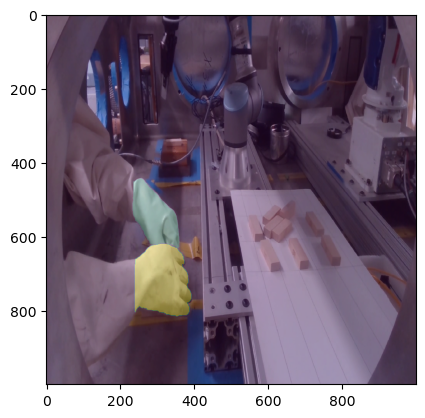

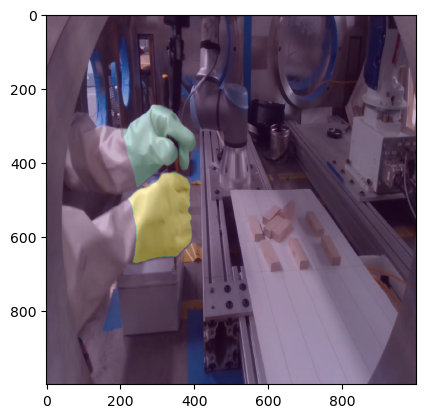

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 │   y1 = y[0].to("cuda")                                                                    │
│    5 │   y2 = y[1].to("cuda")                                                                    │
│    6 │                                                                                           │
│ ❱  7 │   plt.imshow(x[32].cpu().permute(1, 2, 0))                                                │
│    8 │   plt.imshow(y1[32].cpu(), alpha=0.3)                                                     │
│    9 │   plt.show()                                                                              │
│   10                                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
IndexError: index 32 is out of bounds for dimension 0 with size 6

In [18]:
for batch in dataloaders:
    x, y = batch
    x = x.to("cuda")
    y1 = y[0].to("cuda")
    y2 = y[1].to("cuda")

    plt.imshow(x[32].cpu().permute(1, 2, 0))
    plt.imshow(y1[32].cpu(), alpha=0.3)
    plt.show()